# 2401PTDS_Regression_Project_FM2

## Table of contents
* [1. Project Overview and Objectives](#project-description)
* [2. Dataset](#dataset)
* [3. Packages](#packages)
* [4. Environment](#environment)
* [5. Team Members](#team-members)

## 1. Project Overview and Objectives

Your team of environmental consultants and data scientists are tasked by a coalition of agricultural stakeholders to analyse and predict the effect of CO2 emissions on climate change from the agri-food sector. The stakeholders include policymakers, agricultural businesses, and environmental organisations. Your project aims to understand the impact of agricultural activities on climate change and develop strategies for sustainable practices. Utilising a comprehensive dataset compiled from the Food and Agriculture Organization (FAO) and the Intergovernmental Panel on Climate Change (IPCC), you will explore various emission sources, perform regression analysis to predict temperature variations, and offer actionable insights for the stakeholders.

By the end of this project, you will have a thorough understanding of the impact of agricultural activities on CO2 emissions and climate change. Your findings and recommendations will contribute to the ongoing efforts to promote sustainability within the agri-food sector, providing valuable insights for the stakeholders involved in this initiative.

## 2. Import Libraries

In [2]:
import numpy                      as     np
import pandas                     as     pd
import seaborn                    as     sns
import matplotlib.pyplot          as     plt
from sklearn.preprocessing        import MinMaxScaler
from sklearn.model_selection      import train_test_split
from sklearn.linear_model         import LinearRegression
from sklearn.tree                 import DecisionTreeRegressor
from sklearn.ensemble             import RandomForestRegressor
from sklearn.ensemble             import StackingRegressor
from sklearn.metrics              import mean_squared_error, r2_score


In [3]:
#!pip install jupyter_contrib_nbextensions

## 3. Dataset

Emissions from the agri-food sector play a crucial role in climate change, as they represent a significant share of global annual emissions. The dataset highlights the substantial contribution of the various sources of emissions. Therefore, it is essential to understand and address the environmental impact of the agri-food industry to mitigate climate change and promote sustainable practices within this sector.

Dataset Features:

- Savanna fires: Emissions from fires in savanna ecosystems.
- Forest fires: Emissions from fires in forested areas.
- Crop Residues: Emissions from burning or decomposing leftover plant material after crop harvesting.
- Rice Cultivation: Emissions from methane released during rice cultivation.
- Drained organic soils (CO2): Emissions from carbon dioxide released when draining organic soils.
- Pesticides Manufacturing: Emissions from the production of pesticides.
- Food Transport: Emissions from transporting food products.
- Forestland: Land covered by forests.
- Net Forest conversion: Change in forest area due to deforestation and afforestation.
- Food Household Consumption: Emissions from food consumption at the household level.
- Food Retail: Emissions from the operation of retail establishments selling food.
- On-farm Electricity Use: Electricity consumption on farms.
- Food Packaging: Emissions from the production and disposal of food packaging materials.
- Agrifood Systems Waste Disposal: Emissions from waste disposal in the agrifood system.
- Food Processing: Emissions from processing food products.
- Fertilizers Manufacturing: Emissions from the production of fertilizers.
- IPPU: Emissions from industrial processes and product use.
- Manure applied to Soils: Emissions from applying animal manure to agricultural soils.
- Manure left on Pasture: Emissions from animal manure on pasture or grazing land.
- Manure Management: Emissions from managing and treating animal manure.
- Fires in organic soils: Emissions from fires in organic soils.
- Fires in humid tropical forests: Emissions from fires in humid tropical forests.
- On-farm energy use: Energy consumption on farms.
- Rural population: Number of people living in rural areas.
- Urban population: Number of people living in urban areas.
- Total Population - Male: Total number of male individuals in the population.
- Total Population - Female: Total number of female individuals in the population.
- total_emission: Total greenhouse gas emissions from various sources.
- Average Temperature °C: The average increasing of temperature (by year) in degrees Celsius,
- CO2 is recorded in kilotonnes (kt): 1 kt represents 1000 kg of CO2.

The feature "Average Temperature C°", represents the average yearly temperature increase. For example, if it is 0.12, it means that the temperature in that specific location increased by 0.12 degrees Celsius.

Forestland is the only feature that exhibits negative emissions due to its role as a carbon sink. Through photosynthesis, forests absorb and store carbon dioxide, effectively removing it from the atmosphere. Sustainable forest management, along with afforestation and reforestation efforts, further contribute to negative emissions by increasing carbon sequestration capacity.

### 3.1. Load Dataset

Download the CSV file called co2_emissions_from_agri.csv from the Git repository containing the dataset and store it in the same working directory as this jupyter notebook. 

In [7]:
df = pd.read_csv("co2_emissions_from_agri.csv")
df = pd.DataFrame(df)

## 4. Data Discovery

Here we will perform a preliminary exploration of our dataset to get a better understanding of the data we are working with.

This initial exploration of our data will help uncover underlying patterns and relationships that can inform our choice of models.

In [8]:
df.head(10)

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
5,Afghanistan,1995,14.7237,0.0557,243.8152,666.40,0.0,11.712073,54.6445,-2388.803,...,397.5498,0.0,0.0,NaN,13401971.0,3697570.0,8219467.0,8199445.0,2624.612529,0.285583
6,Afghanistan,1996,38.9302,0.2014,249.0364,686.00,0.0,11.712073,53.1637,-2388.803,...,465.2050,0.0,0.0,NaN,13952791.0,3870093.0,8569175.0,8537421.0,2838.921329,0.036583
7,Afghanistan,1997,30.9378,0.1193,276.2940,705.60,0.0,11.712073,52.0390,-2388.803,...,511.5927,0.0,0.0,NaN,14373573.0,4008032.0,8916862.0,8871958.0,3204.180115,0.415167
8,Afghanistan,1998,64.1411,0.3263,287.4346,705.60,0.0,11.712073,52.7050,-2388.803,...,541.6598,0.0,0.0,NaN,14733655.0,4130344.0,9275541.0,9217591.0,3560.716661,0.890833
9,Afghanistan,1999,46.1683,0.0895,247.4980,548.80,0.0,11.712073,35.7630,-2388.803,...,611.0611,0.0,0.0,NaN,15137497.0,4266179.0,9667811.0,9595036.0,3694.806533,1.058500


In [9]:
df.tail(10)

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
6955,Zimbabwe,2011,2918.2098,168.1659,100.7798,3.7456,0.0,94.0,268.6740,648.0808,...,312.2478,0.0,0.0,966.3719,9636932.0,4749717.0,6114111.0,6911674.0,23470.631605,0.191167
6956,Zimbabwe,2012,2164.8953,259.4249,103.8422,5.5527,0.0,91.0,304.6578,648.0808,...,314.3433,0.0,0.0,908.2629,9880721.0,4830105.0,6223803.0,7041528.0,22903.232305,0.337000
6957,Zimbabwe,2013,1544.9329,238.1898,96.8978,5.8016,0.0,73.0,338.5506,648.0808,...,317.9359,0.0,0.0,546.0138,10138667.0,4915839.0,6363142.0,7192279.0,22245.497305,0.089667
6958,Zimbabwe,2014,1706.5216,166.6056,94.2907,7.3598,0.0,65.0,306.0107,648.0808,...,240.2096,0.0,0.0,520.7873,10402274.0,5009401.0,6508226.0,7347527.0,21653.810678,0.096333
6959,Zimbabwe,2015,2185.5313,287.1660,72.4948,9.0670,0.0,68.0,296.7483,648.0808,...,273.1156,0.0,0.0,485.3018,10667966.0,5109485.0,6652836.0,7502101.0,23932.067699,1.153417
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.0,251.1465,76500.2982,...,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.0,255.7975,76500.2982,...,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.0,327.0897,76500.2982,...,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.0,290.1893,76500.2982,...,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667
6964,Zimbabwe,2020,481.9027,48.4197,108.3022,7.9733,0.0,73.0,238.7639,76500.2982,...,266.7316,0.0,0.0,444.2335,11980005.0,5700460.0,7385220.0,8284447.0,96505.221853,0.189000


In [10]:
df.shape

(6965, 31)

In [11]:
df.dtypes

Area                                object
Year                                 int64
Savanna fires                      float64
Forest fires                       float64
Crop Residues                      float64
Rice Cultivation                   float64
Drained organic soils (CO2)        float64
Pesticides Manufacturing           float64
Food Transport                     float64
Forestland                         float64
Net Forest conversion              float64
Food Household Consumption         float64
Food Retail                        float64
On-farm Electricity Use            float64
Food Packaging                     float64
Agrifood Systems Waste Disposal    float64
Food Processing                    float64
Fertilizers Manufacturing          float64
IPPU                               float64
Manure applied to Soils            float64
Manure left on Pasture             float64
Manure Management                  float64
Fires in organic soils             float64
Fires in hu

In [12]:
df.describe()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
count,6965.000000,6934.000000,6872.000000,5576.000000,6965.000000,6965.000000,6965.000000,6965.000000,6472.000000,6.472000e+03,...,6037.000000,6965.000000,6810.000000,6009.000000,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6965.000000
mean,2005.124910,1188.390893,919.302167,998.706309,4259.666673,3503.228636,333.418393,1939.581760,-17828.285678,1.760564e+04,...,2263.344946,1210.315532,668.452931,3008.982252,1.785774e+07,1.693230e+07,1.761963e+07,1.732447e+07,6.409124e+04,0.872989
std,8.894665,5246.287783,3720.078752,3700.345330,17613.825187,15861.445678,1429.159367,5616.748808,81832.210543,1.011575e+05,...,7980.542461,22669.847760,3264.879486,12637.864430,8.901521e+07,6.574362e+07,7.603993e+07,7.251711e+07,2.283130e+05,0.555930
min,1990.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.000100,-797183.079000,0.000000e+00,...,0.432900,0.000000,0.000000,0.031900,0.000000e+00,0.000000e+00,2.500000e+02,2.700000e+02,-3.918841e+05,-1.415833
25%,1997.000000,0.000000,0.000000,11.006525,181.260800,0.000000,6.000000,27.958600,-2848.350000,0.000000e+00,...,37.632100,0.000000,0.000000,13.291900,9.731100e+04,2.173860e+05,2.013260e+05,2.078900e+05,5.221244e+03,0.511333
50%,2005.000000,1.651850,0.517900,103.698200,534.817400,0.000000,13.000000,204.962800,-62.920000,4.444000e+01,...,269.856300,0.000000,0.000000,141.096300,1.595322e+06,2.357581e+06,2.469660e+06,2.444135e+06,1.214765e+04,0.834300
75%,2013.000000,111.081400,64.950775,377.640975,1536.640000,690.408800,116.325487,1207.000900,0.000000,4.701746e+03,...,1126.818900,0.000000,9.577875,1136.925400,8.177340e+06,8.277123e+06,9.075924e+06,9.112588e+06,3.513973e+04,1.206750
max,2020.000000,114616.401100,52227.630600,33490.074100,164915.255600,241025.069600,16459.000000,67945.765000,171121.076000,1.605106e+06,...,70592.646500,991717.543100,51771.256800,248879.176900,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06,3.558083


In [17]:
df.dtypes

Year                     int64
Savanna fires          float64
Forest fires           float64
Crop Residues          float64
Rice Cultivation       float64
                        ...   
Area_Western Sahara       bool
Area_Yemen                bool
Area_Yugoslav SFR         bool
Area_Zambia               bool
Area_Zimbabwe             bool
Length: 265, dtype: object

In [16]:
df.describe()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
count,6965.000000,6934.000000,6872.000000,5576.000000,6965.000000,6965.000000,6965.000000,6965.000000,6472.000000,6.472000e+03,...,6037.000000,6965.000000,6810.000000,6009.000000,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6965.000000
mean,2005.124910,1188.390893,919.302167,998.706309,4259.666673,3503.228636,333.418393,1939.581760,-17828.285678,1.760564e+04,...,2263.344946,1210.315532,668.452931,3008.982252,1.785774e+07,1.693230e+07,1.761963e+07,1.732447e+07,6.409124e+04,0.872989
std,8.894665,5246.287783,3720.078752,3700.345330,17613.825187,15861.445678,1429.159367,5616.748808,81832.210543,1.011575e+05,...,7980.542461,22669.847760,3264.879486,12637.864430,8.901521e+07,6.574362e+07,7.603993e+07,7.251711e+07,2.283130e+05,0.555930
min,1990.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.000100,-797183.079000,0.000000e+00,...,0.432900,0.000000,0.000000,0.031900,0.000000e+00,0.000000e+00,2.500000e+02,2.700000e+02,-3.918841e+05,-1.415833
25%,1997.000000,0.000000,0.000000,11.006525,181.260800,0.000000,6.000000,27.958600,-2848.350000,0.000000e+00,...,37.632100,0.000000,0.000000,13.291900,9.731100e+04,2.173860e+05,2.013260e+05,2.078900e+05,5.221244e+03,0.511333
50%,2005.000000,1.651850,0.517900,103.698200,534.817400,0.000000,13.000000,204.962800,-62.920000,4.444000e+01,...,269.856300,0.000000,0.000000,141.096300,1.595322e+06,2.357581e+06,2.469660e+06,2.444135e+06,1.214765e+04,0.834300
75%,2013.000000,111.081400,64.950775,377.640975,1536.640000,690.408800,116.325487,1207.000900,0.000000,4.701746e+03,...,1126.818900,0.000000,9.577875,1136.925400,8.177340e+06,8.277123e+06,9.075924e+06,9.112588e+06,3.513973e+04,1.206750
max,2020.000000,114616.401100,52227.630600,33490.074100,164915.255600,241025.069600,16459.000000,67945.765000,171121.076000,1.605106e+06,...,70592.646500,991717.543100,51771.256800,248879.176900,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06,3.558083


In [15]:
print(df.Area.unique().size)
df.Area.unique()

236


array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belgium-Luxembourg', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Channel Islands', 'Chile', 'China', 'China, Hong Kong SAR',
       'China, Macao SAR', 'China, mainland', 'China, Taiwan Province of',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Czechoslovakia',
       "Democratic People's Republic of Korea",
       'Democratic 

In [19]:
Area_Rows=df.groupby('Area').count()
Area_Rows=Area_Rows.sort_values(by=['Year'])
Area_Rows

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
Area,,,,,,,,,,,,,,,,,,,,,
Pacific Islands Trust Territory,1,1,1,1,1,1,1,1,1,1,...,0,1,1,0,1,1,1,1,1,1
Yugoslav SFR,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
USSR,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Czechoslovakia,3,3,3,3,3,3,3,3,3,3,...,3,3,3,2,3,3,3,3,3,3
Ethiopia PDR,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Guatemala,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
Guinea,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
Guinea-Bissau,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31


In [25]:
print("The Areas with less than 31 observations are :",Area_Rows['Year'].where(Area_Rows['Year'] < 31).count())
Area_Rows['Year'].where(Area_Rows['Year'] < 31).dropna()

The Areas with less than 31 observations are : 42


Area
Pacific Islands Trust Territory      1.0
Yugoslav SFR                         2.0
USSR                                 2.0
Czechoslovakia                       3.0
Ethiopia PDR                         3.0
Sudan                                9.0
South Sudan                          9.0
Belgium-Luxembourg                  10.0
Serbia and Montenegro               14.0
Montenegro                          15.0
Serbia                              15.0
Netherlands Antilles (former)       21.0
Belgium                             21.0
Luxembourg                          21.0
Sudan (former)                      22.0
Ethiopia                            28.0
Czechia                             28.0
Slovakia                            28.0
Eritrea                             28.0
Croatia                             29.0
Slovenia                            29.0
Tajikistan                          29.0
Georgia                             29.0
North Macedonia                     29.0
Bosnia and 

### Checking the completeness of the Data

In [26]:
df.isnull().any()

Area                               False
Year                               False
Savanna fires                       True
Forest fires                        True
Crop Residues                       True
Rice Cultivation                   False
Drained organic soils (CO2)        False
Pesticides Manufacturing           False
Food Transport                     False
Forestland                          True
Net Forest conversion               True
Food Household Consumption          True
Food Retail                        False
On-farm Electricity Use            False
Food Packaging                     False
Agrifood Systems Waste Disposal    False
Food Processing                    False
Fertilizers Manufacturing          False
IPPU                                True
Manure applied to Soils             True
Manure left on Pasture             False
Manure Management                   True
Fires in organic soils             False
Fires in humid tropical forests     True
On-farm energy u

###### Below is the list of columns with Nulls
1. Savanna fires
2. Forest fires
3. Crop Residues
4. Forestland
5. Net Forest conversion
6. Food Household Consumption
7. IPPU
8. Manure applied to Soils
9. Manure Management
10. Fires in humid tropical forests
11. On-farm energy use

In [28]:
null_mask = df.isnull().any(axis=1)
null_rows = df[null_mask]

null_rows.shape

(2419, 31)

## 5. Data Cleaning

In this section the data will be cleaned by replacing the nulls with either a zero, median, mean or mode. The appropiate approach will be determine by evaluating the skewness of the data after replacing the nulls with zero, mean, mediam or mode.

In [29]:
skew_before=df.skew(axis=0,numeric_only=True,skipna=True)
skew_before

Year                               -0.008413
Savanna fires                      10.347117
Forest fires                        5.839271
Crop Residues                       6.105082
Rice Cultivation                    6.896294
Drained organic soils (CO2)        10.500934
Pesticides Manufacturing            7.405085
Food Transport                      6.116029
Forestland                         -6.307422
Net Forest conversion              11.771650
Food Household Consumption         11.356973
Food Retail                         9.309412
On-farm Electricity Use             9.750162
Food Packaging                     11.979253
Agrifood Systems Waste Disposal     6.953953
Food Processing                     9.364626
Fertilizers Manufacturing          10.255483
IPPU                               11.243412
Manure applied to Soils             6.577909
Manure left on Pasture              5.495126
Manure Management                   6.336033
Fires in organic soils             26.357767
Fires in h

In [30]:
skew_df_Savanna_fires=df['Savanna fires'].skew(numeric_only=True)
skew_df_Forest_fires=df['Forest fires'].skew(numeric_only=True)
skew_df_Crop_Residues=df['Crop Residues'].skew(numeric_only=True)
skew_df_Forestland=df['Forestland'].skew(numeric_only=True)
skew_df_Net_Forest_conversion=df['Net Forest conversion'].skew(numeric_only=True)
skew_df_Food_Household_Consumption=df['Food Household Consumption'].skew(numeric_only=True)
skew_df_IPPU=df['IPPU'].skew(numeric_only=True)
skew_df_Manure_applied_to_Soils=df['Manure applied to Soils'].skew(numeric_only=True)
skew_df_Manure_Management=df['Manure Management'].skew(numeric_only=True)
skew_df_Fires_in_humid_tropical_forests=df['Fires in humid tropical forests'].skew(numeric_only=True)
skew_df_On_farm_energy_use=df['On-farm energy use'].skew(numeric_only=True)

df_0=df.copy(deep=True)
df_mean=df.copy(deep=True)
df_median=df.copy(deep=True)
df_mode=df.copy(deep=True)

In [31]:
df_0=df_0.fillna(0)
df_0.isnull().any()

Area                               False
Year                               False
Savanna fires                      False
Forest fires                       False
Crop Residues                      False
Rice Cultivation                   False
Drained organic soils (CO2)        False
Pesticides Manufacturing           False
Food Transport                     False
Forestland                         False
Net Forest conversion              False
Food Household Consumption         False
Food Retail                        False
On-farm Electricity Use            False
Food Packaging                     False
Agrifood Systems Waste Disposal    False
Food Processing                    False
Fertilizers Manufacturing          False
IPPU                               False
Manure applied to Soils            False
Manure left on Pasture             False
Manure Management                  False
Fires in organic soils             False
Fires in humid tropical forests    False
On-farm energy u

In [ ]:
df_mean=df_mean.fillna(df.mean(numeric_only=True))
df_mean.isnull().any()

In [ ]:
df_median=df_median.fillna(df.median(numeric_only=True))
df_median.isnull().any()

In [ ]:
df_2=df.dropna()
df_2.isnull().any()

In [ ]:
df_mode['Savanna fires']=df_mode['Savanna fires'].fillna(df['Savanna fires'].mode()[0])
df_mode['Forest fires']=df_mode['Forest fires'].fillna(df['Forest fires'].mode()[0])
df_mode['Crop Residues']=df_mode['Crop Residues'].fillna(df['Crop Residues'].mode()[0])
df_mode['Forestland']=df_mode['Forestland'].fillna(df['Forestland'].mode()[0])
df_mode['Net Forest conversion']=df_mode['Net Forest conversion'].fillna(df['Net Forest conversion'].mode()[0])
df_mode['Food Household Consumption']=df_mode['Food Household Consumption'].fillna(df['Food Household Consumption'].mode()[0])
df_mode['IPPU']=df_mode['IPPU'].fillna(df['IPPU'].mode()[0])
df_mode['Manure applied to Soils']=df_mode['Manure applied to Soils'].fillna(df['Manure applied to Soils'].mode()[0])
df_mode['Manure Management']=df_mode['Manure Management'].fillna(df['Manure Management'].mode()[0])
df_mode['Fires in humid tropical forests']=df_mode['Fires in humid tropical forests'].fillna(df['Fires in humid tropical forests'].mode()[0])
df_mode['On-farm energy use']=df_mode['On-farm energy use'].fillna(df['On-farm energy use'].mode()[0])




df_mode.isnull().any()

In [ ]:
skew_df_0_Savanna_fires=df_0['Savanna fires'].skew(numeric_only=True)
skew_df_0_Forest_fires=df_0['Forest fires'].skew(numeric_only=True)
skew_df_0_Crop_Residues=df_0['Crop Residues'].skew(numeric_only=True)
skew_df_0_Forestland=df_0['Forestland'].skew(numeric_only=True)
skew_df_0_Net_Forest_conversion=df_0['Net Forest conversion'].skew(numeric_only=True)
skew_df_0_Food_Household_Consumption=df_0['Food Household Consumption'].skew(numeric_only=True)
skew_df_0_IPPU=df_0['IPPU'].skew(numeric_only=True)
skew_df_0_Manure_applied_to_Soils=df_0['Manure applied to Soils'].skew(numeric_only=True)
skew_df_0_Manure_Management=df_0['Manure Management'].skew(numeric_only=True)
skew_df_0_Fires_in_humid_tropical_forests=df_0['Fires in humid tropical forests'].skew(numeric_only=True)
skew_df_0_On_farm_energy_use=df_0['On-farm energy use'].skew(numeric_only=True)

skew_df_mean_Savanna_fires=df_mean['Savanna fires'].skew(numeric_only=True)
skew_df_mean_Forest_fires=df_mean['Forest fires'].skew(numeric_only=True)
skew_df_mean_Crop_Residues=df_mean['Crop Residues'].skew(numeric_only=True)
skew_df_mean_Forestland=df_mean['Forestland'].skew(numeric_only=True)
skew_df_mean_Net_Forest_conversion=df_mean['Net Forest conversion'].skew(numeric_only=True)
skew_df_mean_Food_Household_Consumption=df_mean['Food Household Consumption'].skew(numeric_only=True)
skew_df_mean_IPPU=df_mean['IPPU'].skew(numeric_only=True)
skew_df_mean_Manure_applied_to_Soils=df_mean['Manure applied to Soils'].skew(numeric_only=True)
skew_df_mean_Manure_Management=df_mean['Manure Management'].skew(numeric_only=True)
skew_df_mean_Fires_in_humid_tropical_forests=df_mean['Fires in humid tropical forests'].skew(numeric_only=True)
skew_df_mean_On_farm_energy_use=df_mean['On-farm energy use'].skew(numeric_only=True)

skew_df_median_Savanna_fires=df_median['Savanna fires'].skew(numeric_only=True)
skew_df_median_Forest_fires=df_median['Forest fires'].skew(numeric_only=True)
skew_df_median_Crop_Residues=df_median['Crop Residues'].skew(numeric_only=True)
skew_df_median_Forestland=df_median['Forestland'].skew(numeric_only=True)
skew_df_median_Net_Forest_conversion=df_median['Net Forest conversion'].skew(numeric_only=True)
skew_df_median_Food_Household_Consumption=df_median['Food Household Consumption'].skew(numeric_only=True)
skew_df_median_IPPU=df_median['IPPU'].skew(numeric_only=True)
skew_df_median_Manure_applied_to_Soils=df_median['Manure applied to Soils'].skew(numeric_only=True)
skew_df_median_Manure_Management=df_median['Manure Management'].skew(numeric_only=True)
skew_df_median_Fires_in_humid_tropical_forests=df_median['Fires in humid tropical forests'].skew(numeric_only=True)
skew_df_median_On_farm_energy_use=df_median['On-farm energy use'].skew(numeric_only=True)

skew_df_mode_Savanna_fires=df_mode['Savanna fires'].skew(numeric_only=True)
skew_df_mode_Forest_fires=df_mode['Forest fires'].skew(numeric_only=True)
skew_df_mode_Crop_Residues=df_mode['Crop Residues'].skew(numeric_only=True)
skew_df_mode_Forestland=df_mode['Forestland'].skew(numeric_only=True)
skew_df_mode_Net_Forest_conversion=df_mode['Net Forest conversion'].skew(numeric_only=True)
skew_df_mode_Food_Household_Consumption=df_mode['Food Household Consumption'].skew(numeric_only=True)
skew_df_mode_IPPU=df_mode['IPPU'].skew(numeric_only=True)
skew_df_mode_Manure_applied_to_Soils=df_mode['Manure applied to Soils'].skew(numeric_only=True)
skew_df_mode_Manure_Management=df_mode['Manure Management'].skew(numeric_only=True)
skew_df_mode_Fires_in_humid_tropical_forests=df_mode['Fires in humid tropical forests'].skew(numeric_only=True)
skew_df_mode_On_farm_energy_use=df_mode['On-farm energy use'].skew(numeric_only=True)


In [ ]:
skew_df_0_Savanna_fires=df_0['Savanna fires'].skew(numeric_only=True)
skew_df_0_Forest_fires=df_0['Forest fires'].skew(numeric_only=True)
skew_df_0_Crop_Residues=df_0['Crop Residues'].skew(numeric_only=True)
skew_df_0_Forestland=df_0['Forestland'].skew(numeric_only=True)
skew_df_0_Net_Forest_conversion=df_0['Net Forest conversion'].skew(numeric_only=True)
skew_df_0_Food_Household_Consumption=df_0['Food Household Consumption'].skew(numeric_only=True)
skew_df_0_IPPU=df_0['IPPU'].skew(numeric_only=True)
skew_df_0_Manure_applied_to_Soils=df_0['Manure applied to Soils'].skew(numeric_only=True)
skew_df_0_Manure_Management=df_0['Manure Management'].skew(numeric_only=True)
skew_df_0_Fires_in_humid_tropical_forests=df_0['Fires in humid tropical forests'].skew(numeric_only=True)
skew_df_0_On_farm_energy_use=df_0['On-farm energy use'].skew(numeric_only=True)

skew_df_mean_Savanna_fires=df_mean['Savanna fires'].skew(numeric_only=True)
skew_df_mean_Forest_fires=df_mean['Forest fires'].skew(numeric_only=True)
skew_df_mean_Crop_Residues=df_mean['Crop Residues'].skew(numeric_only=True)
skew_df_mean_Forestland=df_mean['Forestland'].skew(numeric_only=True)
skew_df_mean_Net_Forest_conversion=df_mean['Net Forest conversion'].skew(numeric_only=True)
skew_df_mean_Food_Household_Consumption=df_mean['Food Household Consumption'].skew(numeric_only=True)
skew_df_mean_IPPU=df_mean['IPPU'].skew(numeric_only=True)
skew_df_mean_Manure_applied_to_Soils=df_mean['Manure applied to Soils'].skew(numeric_only=True)
skew_df_mean_Manure_Management=df_mean['Manure Management'].skew(numeric_only=True)
skew_df_mean_Fires_in_humid_tropical_forests=df_mean['Fires in humid tropical forests'].skew(numeric_only=True)
skew_df_mean_On_farm_energy_use=df_mean['On-farm energy use'].skew(numeric_only=True)

skew_df_median_Savanna_fires=df_median['Savanna fires'].skew(numeric_only=True)
skew_df_median_Forest_fires=df_median['Forest fires'].skew(numeric_only=True)
skew_df_median_Crop_Residues=df_median['Crop Residues'].skew(numeric_only=True)
skew_df_median_Forestland=df_median['Forestland'].skew(numeric_only=True)
skew_df_median_Net_Forest_conversion=df_median['Net Forest conversion'].skew(numeric_only=True)
skew_df_median_Food_Household_Consumption=df_median['Food Household Consumption'].skew(numeric_only=True)
skew_df_median_IPPU=df_median['IPPU'].skew(numeric_only=True)
skew_df_median_Manure_applied_to_Soils=df_median['Manure applied to Soils'].skew(numeric_only=True)
skew_df_median_Manure_Management=df_median['Manure Management'].skew(numeric_only=True)
skew_df_median_Fires_in_humid_tropical_forests=df_median['Fires in humid tropical forests'].skew(numeric_only=True)
skew_df_median_On_farm_energy_use=df_median['On-farm energy use'].skew(numeric_only=True)

skew_df_mode_Savanna_fires=df_mode['Savanna fires'].skew(numeric_only=True)
skew_df_mode_Forest_fires=df_mode['Forest fires'].skew(numeric_only=True)
skew_df_mode_Crop_Residues=df_mode['Crop Residues'].skew(numeric_only=True)
skew_df_mode_Forestland=df_mode['Forestland'].skew(numeric_only=True)
skew_df_mode_Net_Forest_conversion=df_mode['Net Forest conversion'].skew(numeric_only=True)
skew_df_mode_Food_Household_Consumption=df_mode['Food Household Consumption'].skew(numeric_only=True)
skew_df_mode_IPPU=df_mode['IPPU'].skew(numeric_only=True)
skew_df_mode_Manure_applied_to_Soils=df_mode['Manure applied to Soils'].skew(numeric_only=True)
skew_df_mode_Manure_Management=df_mode['Manure Management'].skew(numeric_only=True)
skew_df_mode_Fires_in_humid_tropical_forests=df_mode['Fires in humid tropical forests'].skew(numeric_only=True)
skew_df_mode_On_farm_energy_use=df_mode['On-farm energy use'].skew(numeric_only=True)

print("The Average skew difference with Zero replacement: " ,AVG_skew_diff_df_0)
print("The Average skew difference with Mean replacement: " ,AVG_skew_diff_df_mean)
print("The Average skew difference with Median replacement: " ,AVG_skew_diff_df_median)
print("The Average skew difference with Mode replacement: " ,AVG_skew_diff_df_mode)


The most minimal average in the differences of the skews of the 11 columns is that of the mean imputatioin dataset.

In [36]:
df_mean.skew(numeric_only=True)

Year                               -0.008413
Savanna fires                      10.347117
Forest fires                        5.839271
Crop Residues                       6.105082
Rice Cultivation                    6.896294
Drained organic soils (CO2)        10.500934
Pesticides Manufacturing            7.405085
Food Transport                      6.116029
Forestland                         -6.307422
Net Forest conversion              11.771650
Food Household Consumption         11.356973
Food Retail                         9.309412
On-farm Electricity Use             9.750162
Food Packaging                     11.979253
Agrifood Systems Waste Disposal     6.953953
Food Processing                     9.364626
Fertilizers Manufacturing          10.255483
IPPU                               11.243412
Manure applied to Soils             6.577909
Manure left on Pasture              5.495126
Manure Management                   6.336033
Fires in organic soils             26.357767
Fires in h

In [37]:
df.skew(numeric_only=True)

Savanna fires                      0.141951
Forest fires                      -0.172937
Crop Residues                     -0.200197
Rice Cultivation                  -0.014070
Drained organic soils (CO2)        0.130084
Pesticides Manufacturing          -0.211498
Food Transport                     0.210112
Forestland                        -0.077469
Net Forest conversion              0.005520
Food Household Consumption        -0.079452
Food Retail                        0.138585
On-farm Electricity Use           -0.052265
Food Packaging                    -0.171781
Agrifood Systems Waste Disposal   -0.137334
Food Processing                   -0.115784
Fertilizers Manufacturing          0.142592
IPPU                              -0.046942
Manure applied to Soils            0.233180
Manure left on Pasture            -0.137669
Manure Management                 -0.050614
Fires in organic soils            -0.177264
Fires in humid tropical forests    0.245544
On-farm energy use              

In [38]:
df.skew(numeric_only=True)

Savanna fires                      0.141951
Forest fires                      -0.172937
Crop Residues                     -0.200197
Rice Cultivation                  -0.014070
Drained organic soils (CO2)        0.130084
Pesticides Manufacturing          -0.211498
Food Transport                     0.210112
Forestland                        -0.077469
Net Forest conversion              0.005520
Food Household Consumption        -0.079452
Food Retail                        0.138585
On-farm Electricity Use           -0.052265
Food Packaging                    -0.171781
Agrifood Systems Waste Disposal   -0.137334
Food Processing                   -0.115784
Fertilizers Manufacturing          0.142592
IPPU                              -0.046942
Manure applied to Soils            0.233180
Manure left on Pasture            -0.137669
Manure Management                 -0.050614
Fires in organic soils            -0.177264
Fires in humid tropical forests    0.245544
On-farm energy use              

 It's clearly seen that the skew affected are affectde by less than 1 unit of change for all 11 columns. Thus the best imputation to deal with the null vales is by using the mean of the vaiables.

In [42]:
df=df_mean.copy(deep=True)
df

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,...,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,...,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,...,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,...,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


Now the Data is clean.

## 6. Exploratory Data Analysis 

The Exploratory Data Analysis (EDA) section is a critical phase in any data-driven project. This section will include various analyzing and visualizing techniques on the Avocado Sales dataset to uncover patterns, detect anomalies, and test hypotheses. In this section, we will use Python’s powerful libraries such as Pandas, Matplotlib, and Seaborn to examine the structure of the data, identify key trends, and gain insights that will guide the next steps in the analysis. The goal is to establish a clear understanding of the data, its quality, and its underlying relationships. Please note that the EDA section is conducted after the data was cleaned as explained in Section 5.

### 6.1. Non-graphical EDA

In the Non-Graphical Exploratory Data Analysis (EDA) sub-section, we focus on gaining insights into the dataset using summary statistics and data manipulation techniques, without relying on visualizations. This approach involves examining key metrics such as mean, median, variance, and distribution of values across features, as well as identifying missing values and outliers. Using Python libraries like Pandas, we will explore the data through descriptive statistics, correlations, and data type checks, which will help to uncover hidden patterns and assess the overall structure of the dataset

In [45]:
df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


Looking at the top five rows of our data we can see all our features as well as the types of data we are working with.

Our features are:

- Area
- Year
- Savanna fires
- Forest fires
- Crop Residues
- Rice Cultivation
- Drained organic soils (CO2)
- Pesticides Manufacturing
- Food Transport
- Forestland
- Manure Management
- Fires in organic soils
- Fires in humid tropical forests
- On-farm energy use
- Rural population
- Urban population
- Total Population - Male
- Total Population - Female
- total_emission
- Average Temperature °C

#### 6.1.1. Understaning the data

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

#### 6.1.2. Data Statistics overview

In [49]:
df.describe()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
count,6965.000000,6934.000000,6872.000000,5576.000000,6965.000000,6965.000000,6965.000000,6965.000000,6472.000000,6.472000e+03,...,6037.000000,6965.000000,6810.000000,6009.000000,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6965.000000
mean,2005.124910,1188.390893,919.302167,998.706309,4259.666673,3503.228636,333.418393,1939.581760,-17828.285678,1.760564e+04,...,2263.344946,1210.315532,668.452931,3008.982252,1.785774e+07,1.693230e+07,1.761963e+07,1.732447e+07,6.409124e+04,0.872989
std,8.894665,5246.287783,3720.078752,3700.345330,17613.825187,15861.445678,1429.159367,5616.748808,81832.210543,1.011575e+05,...,7980.542461,22669.847760,3264.879486,12637.864430,8.901521e+07,6.574362e+07,7.603993e+07,7.251711e+07,2.283130e+05,0.555930
min,1990.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.000100,-797183.079000,0.000000e+00,...,0.432900,0.000000,0.000000,0.031900,0.000000e+00,0.000000e+00,2.500000e+02,2.700000e+02,-3.918841e+05,-1.415833
25%,1997.000000,0.000000,0.000000,11.006525,181.260800,0.000000,6.000000,27.958600,-2848.350000,0.000000e+00,...,37.632100,0.000000,0.000000,13.291900,9.731100e+04,2.173860e+05,2.013260e+05,2.078900e+05,5.221244e+03,0.511333
50%,2005.000000,1.651850,0.517900,103.698200,534.817400,0.000000,13.000000,204.962800,-62.920000,4.444000e+01,...,269.856300,0.000000,0.000000,141.096300,1.595322e+06,2.357581e+06,2.469660e+06,2.444135e+06,1.214765e+04,0.834300
75%,2013.000000,111.081400,64.950775,377.640975,1536.640000,690.408800,116.325487,1207.000900,0.000000,4.701746e+03,...,1126.818900,0.000000,9.577875,1136.925400,8.177340e+06,8.277123e+06,9.075924e+06,9.112588e+06,3.513973e+04,1.206750
max,2020.000000,114616.401100,52227.630600,33490.074100,164915.255600,241025.069600,16459.000000,67945.765000,171121.076000,1.605106e+06,...,70592.646500,991717.543100,51771.256800,248879.176900,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06,3.558083


#### 6.1.3. Central tendency

###### 5.1.3.1. Mode

In [50]:
mode = df.mode(numeric_only=True)
first_index_mode = mode.iloc[0]

print(first_index_mode)

Year                               2.006000e+03
Savanna fires                      0.000000e+00
Forest fires                       0.000000e+00
Crop Residues                      2.000000e-04
Rice Cultivation                   2.464073e+02
Drained organic soils (CO2)        0.000000e+00
Pesticides Manufacturing           1.148108e+01
Food Transport                     2.626266e+01
Forestland                         0.000000e+00
Net Forest conversion              0.000000e+00
Food Household Consumption         5.104000e-01
Food Retail                        3.783863e+01
On-farm Electricity Use            1.700466e+01
Food Packaging                     6.763137e+01
Agrifood Systems Waste Disposal    6.507235e+01
Food Processing                    2.095877e+02
Fertilizers Manufacturing          3.564910e+02
IPPU                               0.000000e+00
Manure applied to Soils            4.900000e-02
Manure left on Pasture             2.148252e+03
Manure Management                  4.329

#####  6.1.3.2. Median

In [ ]:
median_df = df[['Savanna fires', 'Forest fires','Crop Residues','Rice Cultivation','Drained organic soils (CO2)',
                'Pesticides Manufacturing','Food Transport','Forestland','Net Forest conversion',
                'Food Household Consumption','Food Retail','On-farm Electricity Use','Food Packaging',
                'Fertilizers Manufacturing','IPPU','Manure applied to Soils','Manure left on Pasture',
                'Manure Management','Fires in organic soils','Fires in humid tropical forests','On-farm energy use',
                'Rural population','Urban population','Total Population - Male','Total Population - Female',
                'total_emission','Average Temperature °C']].median()
print(median_df)

#####  6.1.3.3. Mean

In [ ]:
mean_df = df[['Savanna fires', 'Forest fires','Crop Residues','Rice Cultivation','Drained organic soils (CO2)',
                'Pesticides Manufacturing','Food Transport','Forestland','Net Forest conversion',
                'Food Household Consumption','Food Retail','On-farm Electricity Use','Food Packaging',
                'Fertilizers Manufacturing','IPPU','Manure applied to Soils','Manure left on Pasture',
                'Manure Management','Fires in organic soils','Fires in humid tropical forests','On-farm energy use',
                'Rural population','Urban population','Total Population - Male','Total Population - Female',
                'total_emission','Average Temperature °C']].mean()
print(mean_df)

#### 6.1.3.4. Skewness & Kurtosis

The Skewness measure the outliers present in the data.

In [53]:
df.skew(numeric_only=True)

Year                               -0.008413
Savanna fires                      10.347117
Forest fires                        5.839271
Crop Residues                       6.105082
Rice Cultivation                    6.896294
Drained organic soils (CO2)        10.500934
Pesticides Manufacturing            7.405085
Food Transport                      6.116029
Forestland                         -6.307422
Net Forest conversion              11.771650
Food Household Consumption         11.356973
Food Retail                         9.309412
On-farm Electricity Use             9.750162
Food Packaging                     11.979253
Agrifood Systems Waste Disposal     6.953953
Food Processing                     9.364626
Fertilizers Manufacturing          10.255483
IPPU                               11.243412
Manure applied to Soils             6.577909
Manure left on Pasture              5.495126
Manure Management                   6.336033
Fires in organic soils             26.357767
Fires in h

The Kurtosis indicates outliers for all features.

In [54]:
df.kurtosis(numeric_only=True)

Year                                -1.197086
Savanna fires                      157.123473
Forest fires                        38.862255
Crop Residues                       39.239780
Rice Cultivation                    50.375853
Drained organic soils (CO2)        131.538354
Pesticides Manufacturing            59.773128
Food Transport                      48.794946
Forestland                          43.487068
Net Forest conversion              157.780226
Food Household Consumption         152.413754
Food Retail                        103.279139
On-farm Electricity Use            112.460201
Food Packaging                     155.498327
Agrifood Systems Waste Disposal     52.912176
Food Processing                     99.118839
Fertilizers Manufacturing          116.215306
IPPU                               144.234525
Manure applied to Soils             48.334425
Manure left on Pasture              35.322616
Manure Management                   42.666018
Fires in organic soils            

### 6.1.4 Non-Numeric Data

In [ ]:
df.select_dtypes(include=['object']).head()

In [ ]:
df.groupby('Area')[['Average Temperature °C']].sum().sort_values(by='Average Temperature °C', ascending=False).head(10) #see total volumes per year

In [ ]:
grouped_df = df.groupby(['Year', 'Area']).agg({'Average Temperature °C': 'sum'}).reset_index()
print(grouped_df)

## 6.2 Graphical EDA

## Train-test split

The data will be split into two parts: training data and testing data. Given that the dataset contains approximately 7,000 records, it is considered small. Therefore, a larger test size is appropriate. Consequently, 30% of the data will be used for testing. To ensure consistency in the data split each time the code is executed, the random state will be set to 50.

In [36]:
y = df['Average Temperature °C']
X = df.drop(columns = ['Average Temperature °C'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
print(len(X_train), len(X_test) , len(y_train), len(y_test))

XX = df.drop('On-farm energy use', axis = 1)
XX.head()


70 30 70 30


,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,...,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,24.509581,67.850809,42.443775,56.274624,32.298119,42.493005,65.252992,49.474250,0.052849,2.882810,...,62.071698,61.319717,58.144338,2.665502,20233,4261734,3868778,566985,636.889275,-6.225152
1,75.558365,56.618283,36.606647,1.403093,76.944061,26.801823,7.380602,77.249582,26.894779,44.826891,...,11.439948,4.092759,17.198044,98.712465,5315,914289,1249358,1496477,5911.151768,-9.954116
2,8.656681,23.833180,26.953212,56.102294,96.842517,18.813346,72.691564,14.636047,36.420725,80.084372,...,55.629281,59.304927,99.503885,40.980193,34082,396703,2728485,3171072,781.157138,27.764797
3,28.012729,8.677551,16.814032,36.967498,81.278656,62.482721,22.201829,84.968460,86.251616,82.023486,...,78.546316,51.103219,27.255185,49.133168,3875,2472840,844439,4557340,9072.626278,24.670210
4,46.298179,5.471903,26.241167,72.556218,62.162496,63.008934,46.853475,26.228263,11.469903,9.335752,...,5.467658,80.300856,3.161600,15.198811,21291,1208089,4130711,2984567,1751.269678,-1.552422


# Model Training, Evaluation and Selections

Data Cleaning - Theo

EDA - Marcus

Variable Selection - Mfana

Train-test splits - Manqoba 

### Model 1 -Decisionn Tree Regressor/Bagging -  Mfana

### Model 2 -Random Forest Regressor -Manqoba

The Random forest regression is ideal for complex relationships, high-dimensional data and it performs better in reducing the overfitting. It is expected to perform better on this given data, since the Carbon Dioxide emission is impacted by several condtions in a complex way.

##### Random Forest Regression Training

In [28]:
Model2_Random_Forest = RandomForestRegressor(n_estimators=100, max_depth=5)
Model2_Random_Forest.fit(X_train,y_train)

RandomForestRegressor(max_depth=5)

##### Random Forest Regression Testing

In [29]:
Model2_Avg_Temp = Model2_Random_Forest.predict(X_test)
print("The Mean Squared Error (MSE) for Model 2 is : ",mean_squared_error(y_test,Model2_Avg_Temp))
print("The Root Mean Squared Error (RMSE) for Model 2 is : ",np.sqrt(mean_squared_error(y_test,Model2_Avg_Temp)))


The Mean Squared Error (MSE) for Model 2 is :  225.99741505431717
The Root Mean Squared Error (RMSE) for Model 2 is :  15.033210404112529


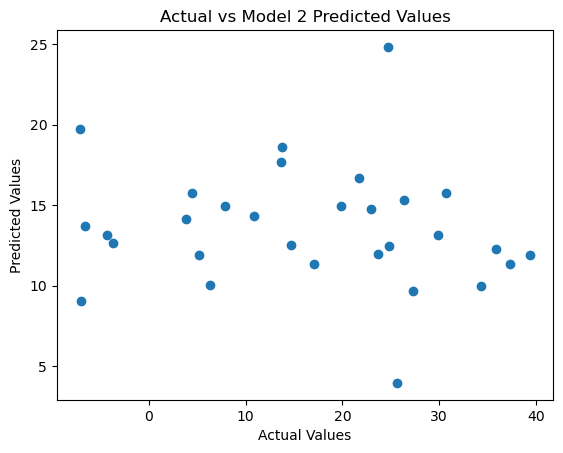

In [31]:
plt.scatter(y_test, Model2_Avg_Temp)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Model 2 Predicted Values')
plt.show()

### Model 3 - Support Vector Regression - Mfana

### Model 4 - Simple Linear Model

The Simple Linear Regression is mostly used in predicting the target variable when it is suspected that there is a linear relationship between features and target variable. It is the most quick and computationally inexpensive model.

##### Simple Linear Model Training

In [24]:
Model4_Simple_Linear = LinearRegression()
Model4_Simple_Linear.fit(X_train,y_train)

LinearRegression()

##### Simple Linear Model Testing

In [33]:
Model4_Avg_Temp = Model4_Simple_Linear.predict(X_test)
print("The Mean Squared Error (MSE) for Model 4 is : ",mean_squared_error(y_test,Model4_Avg_Temp))
print("The Root Mean Squared Error (RMSE) for Model 4 is : ",np.sqrt(mean_squared_error(y_test,Model4_Avg_Temp)))

The Mean Squared Error (MSE) for Model 4 is :  279.0595681121534
The Root Mean Squared Error (RMSE) for Model 4 is :  16.70507611811911


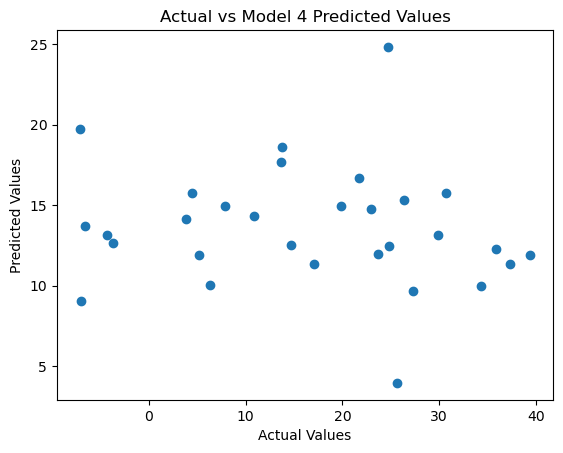

In [32]:
plt.scatter(y_test, Model2_Avg_Temp)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Model 4 Predicted Values')
plt.show()

### Model Selection - Manqoba

|Model                        | Mean Squared Error (MSE)       | Root Mean Squared Error (RMSE) | Square Error 
|-----------------------------|--------------------------------|--------------------------------|
|Model 1 - Decision Tree      | 0.00000                        | 0.00000                        |
|Model 2 - Random Forest      | 0.00000                        | 0.00000                        |
|Model 3 - Support Vector Regression| 0.0000                   | 0.00000                        |
|Model 4 - Linear Regression | 0.0000                          | 0.00000                        |

# Conclusion Insight

# Recommendations

# Team Members

|Full Name                        | Email Address                  |
|---------------------------------|--------------------------------|
|Manqoba Mnguni                   | manqoba.mnguni@vodacom.co.za   | 
|Marcus Van Staden                | marcus.vanstaden@vodacom.co.za | 
|Theo Tsinyane                    | theo.tsinyane@vodacom.co.za    |
|Mfana Nkabinde                   | mfana.nkabinde@vodacom.co.za   |

## Appendix